# **PRE-PROCESSING**

In [ ]:
import pandas as pd
df = pd.read_csv("support2.csv")
df

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,...,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,...,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,NaN,7.000000
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,...,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,<2 mo. follow-up,0.000000
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,...,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,no(M2 and SIP pres),0.000000
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,no(M2 and SIP pres),2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9101,66.07300,0,male,0,23,350,ARF/MOSF w/Sepsis,ARF/MOSF,1,8.0,...,1.099854,131.0,7.459961,188.0,21.0,NaN,NaN,0.0,NaN,0.000000
9102,55.15399,0,female,0,29,347,Coma,Coma,1,11.0,...,5.899414,135.0,7.289062,190.0,49.0,0.0,NaN,0.0,NaN,0.000000
9103,70.38196,0,male,0,8,346,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,...,2.699707,139.0,7.379883,189.0,60.0,3900.0,NaN,NaN,NaN,2.525391
9104,47.01999,1,male,1,7,7,MOSF w/Malig,ARF/MOSF,1,13.0,...,3.500000,135.0,7.469727,246.0,55.0,NaN,NaN,0.0,<2 mo. follow-up,0.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

# **MISSING VALUE**

Dari hasil pengecekan missing value dapat dilihat bahwa yang memiliki missing value tebanyak adalah:
* glucose     52.455828
* bun         50.056735
* urine       54.125466
* adlp        63.186902
* totmcst     54.935970


In [ ]:
missing_values = df.isnull().mean() * 100
print(missing_values)

age          0.000000
death        0.000000
sex          0.000000
hospdead     0.000000
slos         0.000000
d.time       0.000000
dzgroup      0.000000
dzclass      0.000000
num.co       0.000000
edu         17.946183
income      32.751236
scoma        0.010983
charges      1.889072
totcst       9.752883
totmcst     38.165843
avtisst      0.900604
race         0.461285
sps          0.010983
aps          0.010983
surv2m       0.010983
surv6m       0.010983
hday         0.000000
diabetes     0.000000
dementia     0.000000
ca           0.000000
prg2m       18.110928
prg6m       17.935200
dnr          0.329489
dnrday       0.329489
meanbp       0.010983
wblc         2.328391
hrt          0.010983
resp         0.010983
temp         0.010983
pafi        25.535420
alb         37.034596
bili        28.566722
crea         0.735859
sod          0.010983
ph          25.085118
glucose     49.423394
bun         47.797913
urine       53.399231
adlp        61.954970
adls        31.488193
sfdm2     

***VISUALISASI MISSING VALUE***

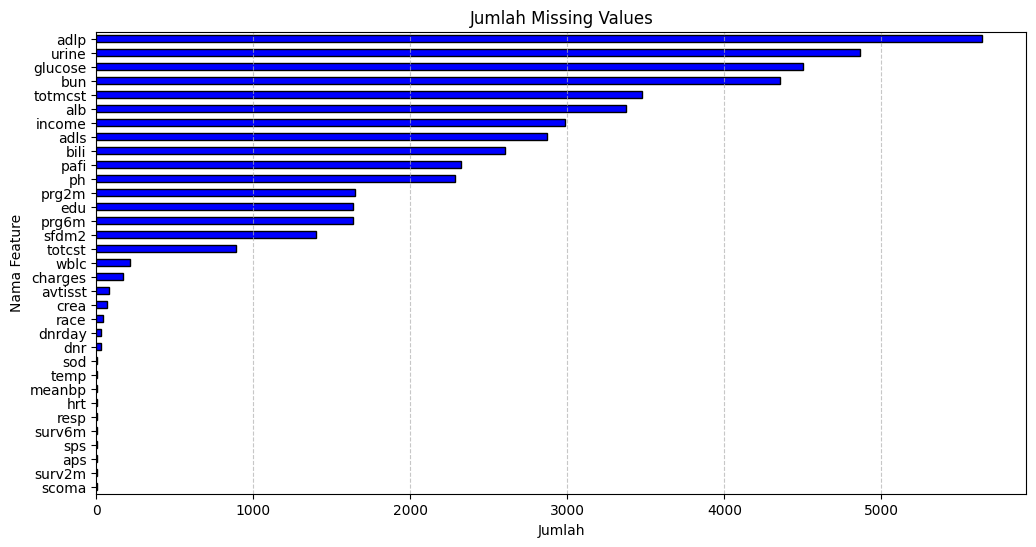

In [ ]:
import matplotlib.pyplot as plt
missing_count = df.isnull().sum()

missing_count = missing_count[missing_count > 0]

plt.figure(figsize=(12, 6))
missing_count.sort_values().plot(kind='barh', color='blue', edgecolor='black')

plt.xlabel('Jumlah')
plt.ylabel('Nama Feature')
plt.title('Jumlah Missing Values')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


penghapusan kolom yang memiliki missing value lebih dari 50% dan kolom yang tidak relevan seperti kolom edu dan race. lalu kolom seperti hospdead dihapus karena target yang akan diambil adalah kolom death.

In [ ]:
df=df.drop(['urine', 'adlp','glucose', 'bun', 'hospdead', 'edu', 'race', 'sfdm2'], axis=1)

**Handling Inconsistence**

pengecekan isi dari kolom dnr (Indikator Do Not Resuscitate)

In [ ]:
nilai_unik = df['dnr'].unique()
print(nilai_unik)

['no dnr' nan 'dnr after sadm' 'dnr before sadm']


In [ ]:
df['dnr'] = df['dnr'].replace({
    'no dnr': 0,
    'dnr after sadm': 1,
    'dnr before sadm': 2
})

df['dnr'] = df['dnr'].fillna(0)

print(df)

           age  death     sex  slos  d.time            dzgroup  \
1     62.84998      0    male     5    2029        Lung Cancer   
2     60.33899      1  female     4       4          Cirrhosis   
3     52.74698      1  female    17      47          Cirrhosis   
4     42.38498      1  female     3     133        Lung Cancer   
5     79.88495      0  female    16    2029  ARF/MOSF w/Sepsis   
...        ...    ...     ...   ...     ...                ...   
9101  66.07300      0    male    23     350  ARF/MOSF w/Sepsis   
9102  55.15399      0  female    29     347               Coma   
9103  70.38196      0    male     8     346  ARF/MOSF w/Sepsis   
9104  47.01999      1    male     7       7       MOSF w/Malig   
9105  81.53894      1  female    12     198  ARF/MOSF w/Sepsis   

                 dzclass  num.co      income  scoma  ...  resp      temp  \
1                 Cancer       0    $11-$25k    0.0  ...  22.0  36.00000   
2     COPD/CHF/Cirrhosis       2    $11-$25k   44.0  ..

C:\Users\snsv\AppData\Local\Temp\ipykernel_22960\1589171554.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['dnr'] = df['dnr'].replace({


pengecekan isi pada kolom income (pendapatan pasien)

In [ ]:
nilai_unik = df['income'].unique()
print(nilai_unik)

['$11-$25k' 'under $11k' nan '$25-$50k' '>$50k']


In [ ]:
import numpy as np

income_mapping = {
    "under $11k": 5.5,
    "$11-$25k": 18,
    "$25-$50k": 37.5,
    ">$50k": 75
}

df["income"] = df["income"].map(income_mapping)
df["income"].fillna(df["income"].mean(), inplace=True)

print(df["income"].head())


1    18.000000
2    18.000000
3     5.500000
4     5.500000
5    21.905275
Name: income, dtype: float64


C:\Users\snsv\AppData\Local\Temp\ipykernel_22960\1356430426.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["income"].fillna(df["income"].mean(), inplace=True)


***VISUALISASI HISTOGRAM***

Digunakan visualisasi histogram untuk melihat distribusi data pada tiap-tiap kolom. Melihat persebaran data tiap kolom apakah skewness atau normal.

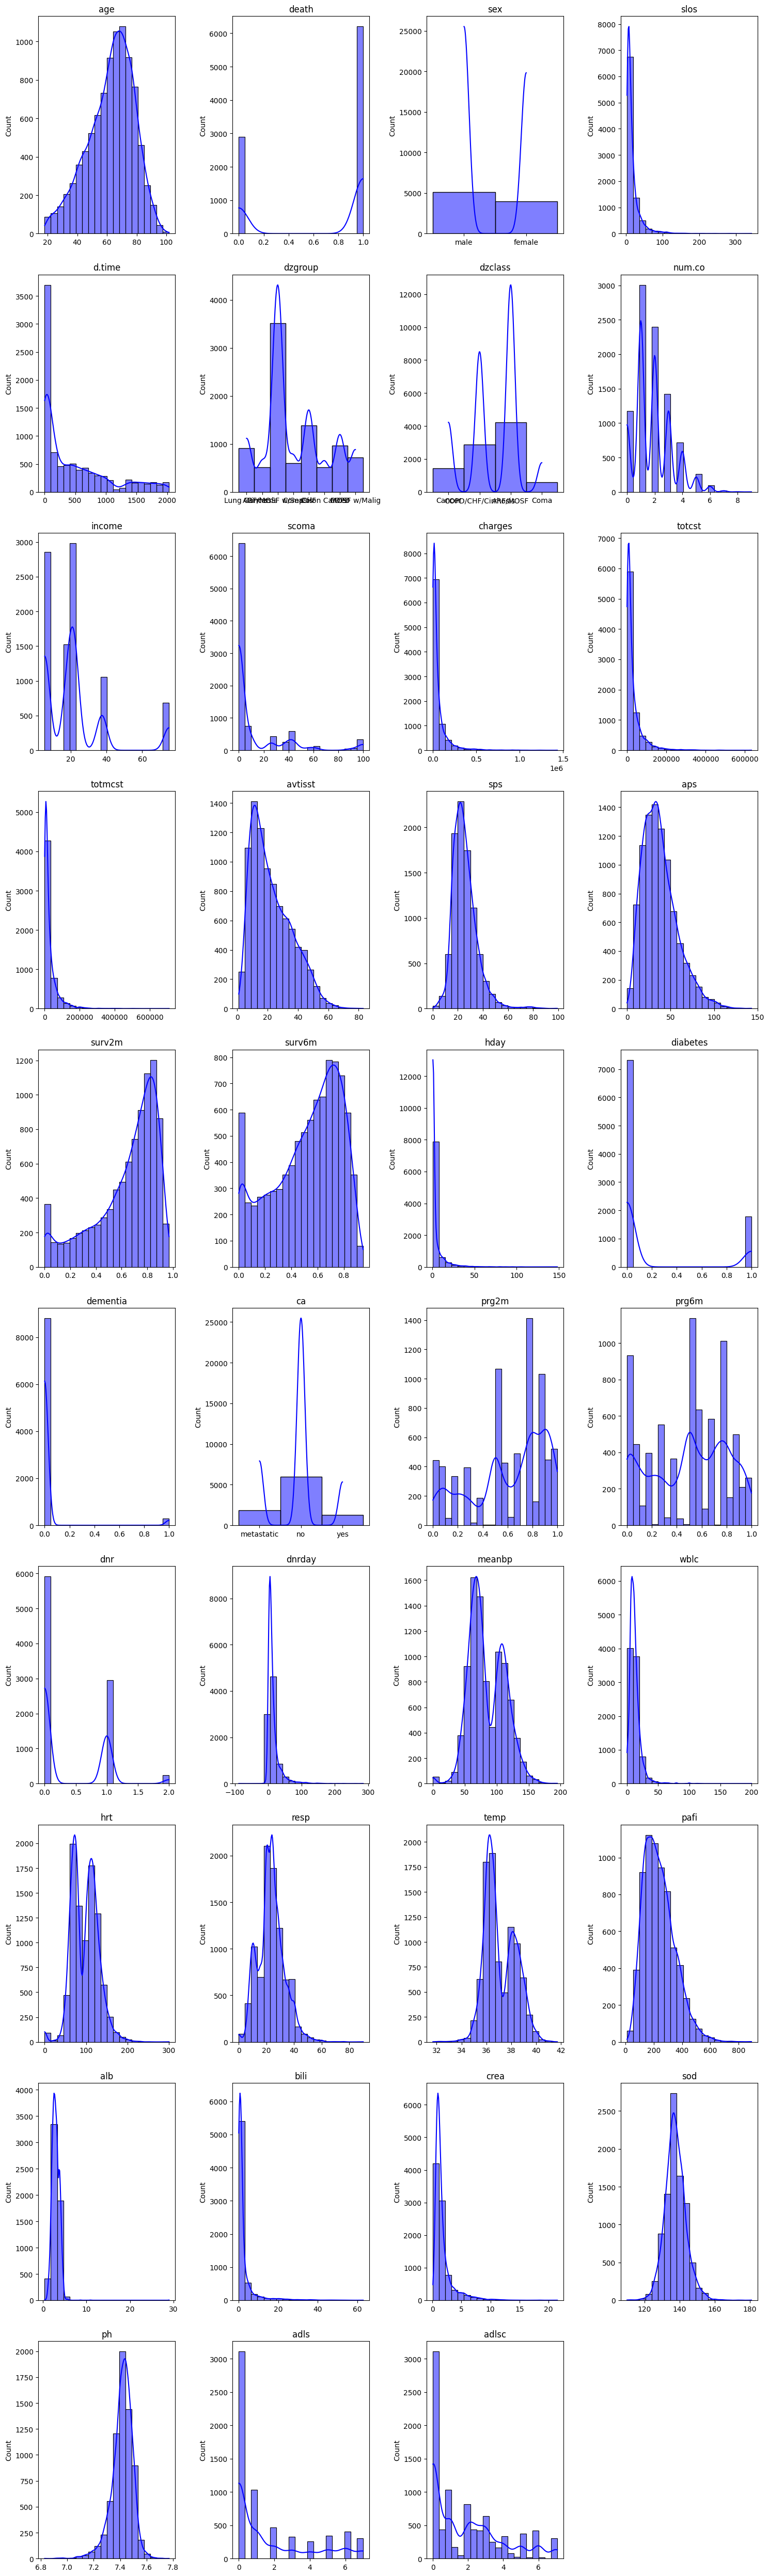

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_for_hist = df.select_dtypes(exclude=['bool'])

n_cols = 4
n_rows = (len(df_for_hist.columns) // n_cols) + (len(df_for_hist.columns) % n_cols > 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 50))

if n_rows * n_cols == 1:
    axes = [axes]
else:
    axes = axes.flatten()

for i, col in enumerate(df_for_hist.columns):
    sns.histplot(df_for_hist[col], bins=20, kde=True, color='blue', edgecolor='black',
                 alpha=0.5,  ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


***VISUALISASI DATA PENGECEKAN OUTLIER***

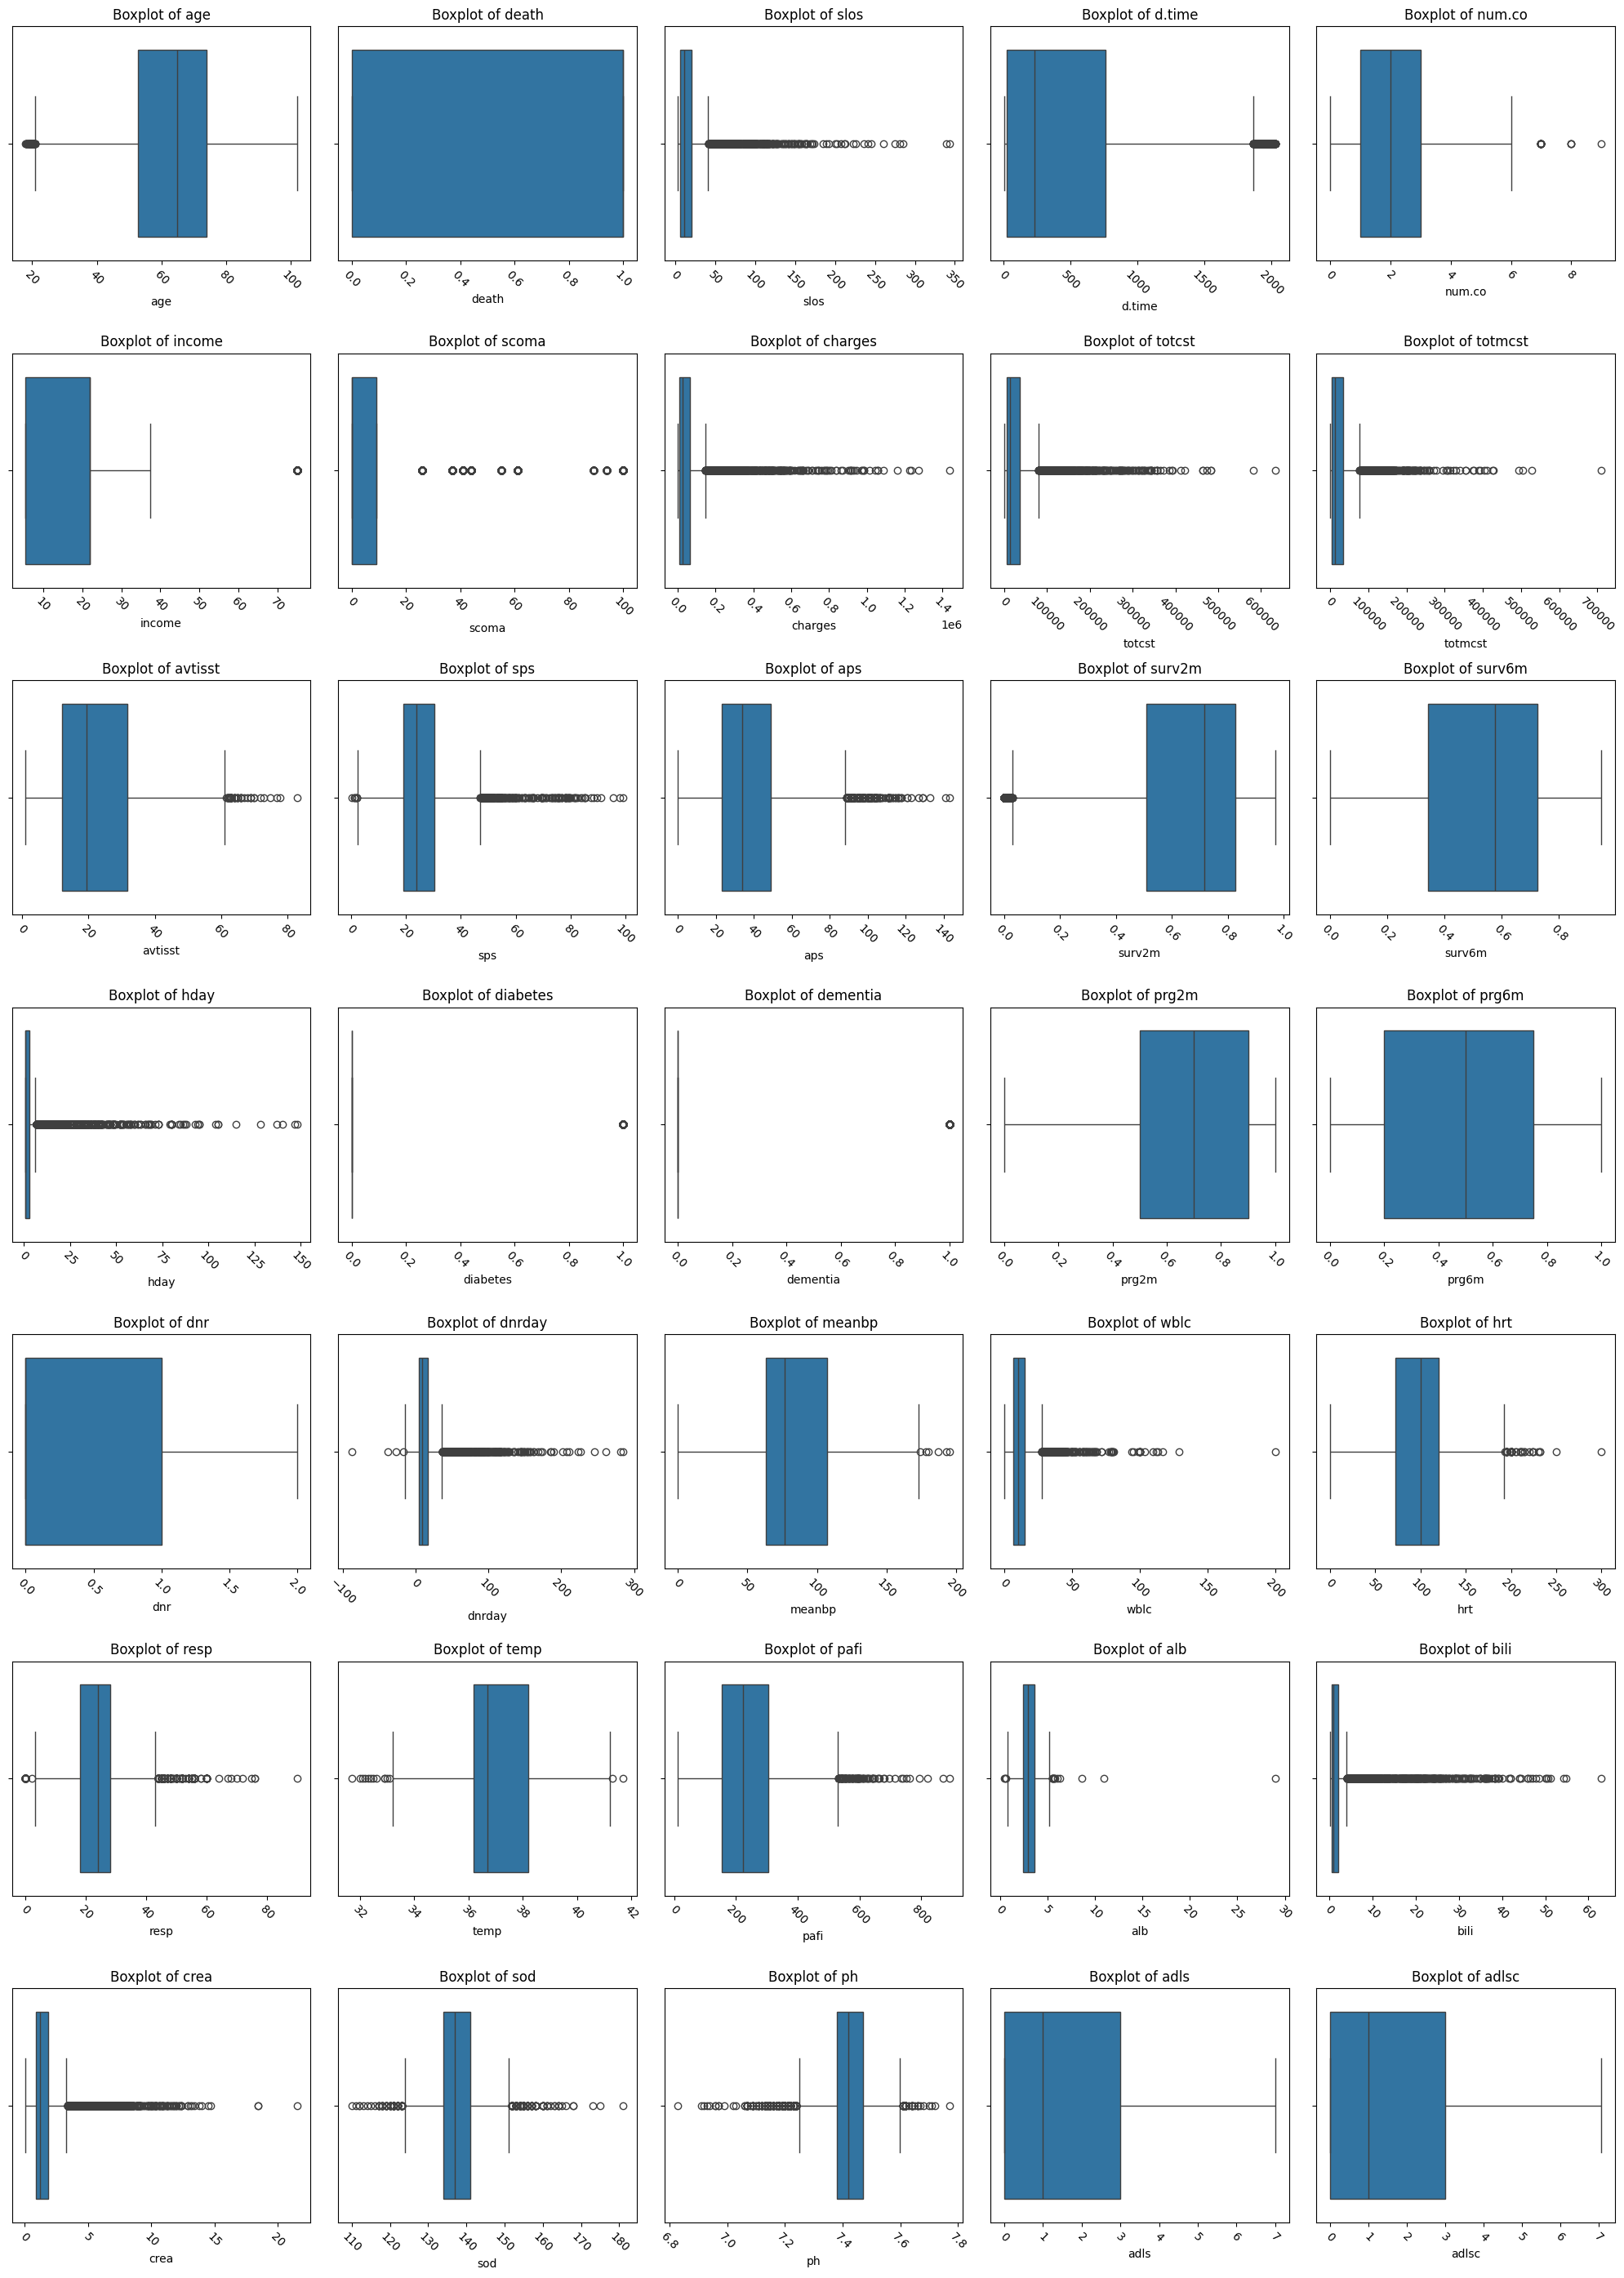

In [ ]:
import math

cols = df.select_dtypes(include=['float64', 'int64']).columns

n_features = len(cols)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(20, 4 * n_rows))

for i, cols in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.xticks(rotation=-45)

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   slos      9105 non-null   int64  
 4   d.time    9105 non-null   int64  
 5   dzgroup   9105 non-null   object 
 6   dzclass   9105 non-null   object 
 7   num.co    9105 non-null   int64  
 8   income    9105 non-null   float64
 9   scoma     9104 non-null   float64
 10  charges   8933 non-null   float64
 11  totcst    8217 non-null   float64
 12  totmcst   5630 non-null   float64
 13  avtisst   9023 non-null   float64
 14  sps       9104 non-null   float64
 15  aps       9104 non-null   float64
 16  surv2m    9104 non-null   float64
 17  surv6m    9104 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int64  
 

***HANDLING MISSING VALUE***

Pada kolom-kolom dibawah dilakukan ***forward fill*** untuk menangani missing value, karena terdapat 1 missing value maka dilakukan pengisian NaN dengan nilai terakhir yang tersedia di atasnya

In [ ]:
columns_to_fill = ['scoma', 'sps', 'aps', 'surv2m', 'surv6m', 'meanbp', 'hrt', 'resp', 'temp', 'sod']
df[columns_to_fill] = df[columns_to_fill].ffill()

Pada kolom dibawah ini dilakukan penanganan missing value dengan menggunakan nilai median karena distrubusi data cenderung miring

In [ ]:
kolom = ['avtisst', 'wblc', 'crea', 'charges', 'totmcst', 'totcst', 'pafi', 'alb',
                'bili', 'ph', 'adls', 'prg2m', 'prg6m', 'adlsc', 'dnrday']

df[kolom] = df[kolom].apply(lambda x: x.fillna(x.median()))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   slos      9105 non-null   int64  
 4   d.time    9105 non-null   int64  
 5   dzgroup   9105 non-null   object 
 6   dzclass   9105 non-null   object 
 7   num.co    9105 non-null   int64  
 8   income    9105 non-null   float64
 9   scoma     9105 non-null   float64
 10  charges   9105 non-null   float64
 11  totcst    9105 non-null   float64
 12  totmcst   9105 non-null   float64
 13  avtisst   9105 non-null   float64
 14  sps       9105 non-null   float64
 15  aps       9105 non-null   float64
 16  surv2m    9105 non-null   float64
 17  surv6m    9105 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int64  
 

Untuk kolom "ca" dilakukan pengubahan variabel kategorikal menjadi numerik dengan One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['ca'], prefix='ca', drop_first=True)
df.head()

,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,income,scoma,...,pafi,alb,bili,crea,sod,ph,adls,adlsc,ca_no,ca_yes
1,62.84998,0,male,5,2029,Lung Cancer,Cancer,0,18.000000,0.0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,7.0,7.0,False,False
2,60.33899,1,female,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,18.000000,44.0,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,1.0,1.0,True,False
3,52.74698,1,female,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,5.500000,0.0,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,0.0,0.0,True,False
4,42.38498,1,female,3,133,Lung Cancer,Cancer,2,5.500000,0.0,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,0.0,0.0,False,False
5,79.88495,0,female,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,21.905275,26.0,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,2.0,2.0,True,False


Untuk kolom "dzgroup" dan "dzclass" dilakukan pengubahan variabel kategorikal menjadi numerik dengan label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['dzgroup'] = le.fit_transform(df['dzgroup'])
df['dzclass'] = le.fit_transform(df['dzclass'])
df.head()

,age,death,sex,slos,d.time,dzgroup,dzclass,num.co,income,scoma,...,pafi,alb,bili,crea,sod,ph,adls,adlsc,ca_no,ca_yes
1,62.84998,0,male,5,2029,6,2,0,18.000000,0.0,...,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,7.0,7.0,False,False
2,60.33899,1,female,4,4,3,1,2,18.000000,44.0,...,98.00000,2.899902,0.899902,5.500000,132.0,7.250000,1.0,1.0,True,False
3,52.74698,1,female,17,47,3,1,2,5.500000,0.0,...,231.65625,2.899902,2.199707,2.000000,134.0,7.459961,0.0,0.0,True,False
4,42.38498,1,female,3,133,6,2,2,5.500000,0.0,...,224.00000,2.899902,0.899902,0.799927,139.0,7.419922,0.0,0.0,False,False
5,79.88495,0,female,16,2029,0,0,1,21.905275,26.0,...,173.31250,2.899902,0.899902,0.799927,143.0,7.509766,2.0,2.0,True,False


***PENANGANAN OUTLIER***

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def penanganan_outlier(df, threshold=1.5):
    numeric_columns = df.select_dtypes(include=["number"]).columns

    Q1 = df[numeric_columns].quantile(0.25)
    Q3 = df[numeric_columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (threshold * IQR)
    upper_bound = Q3 + (threshold * IQR)

    df[numeric_columns] = df[numeric_columns].apply(lambda x: x.clip(lower_bound[x.name], upper_bound[x.name]))

    return df

df = penanganan_outlier(df)

***VISUALISASI SETELAH OUTLIER DITANGANI***

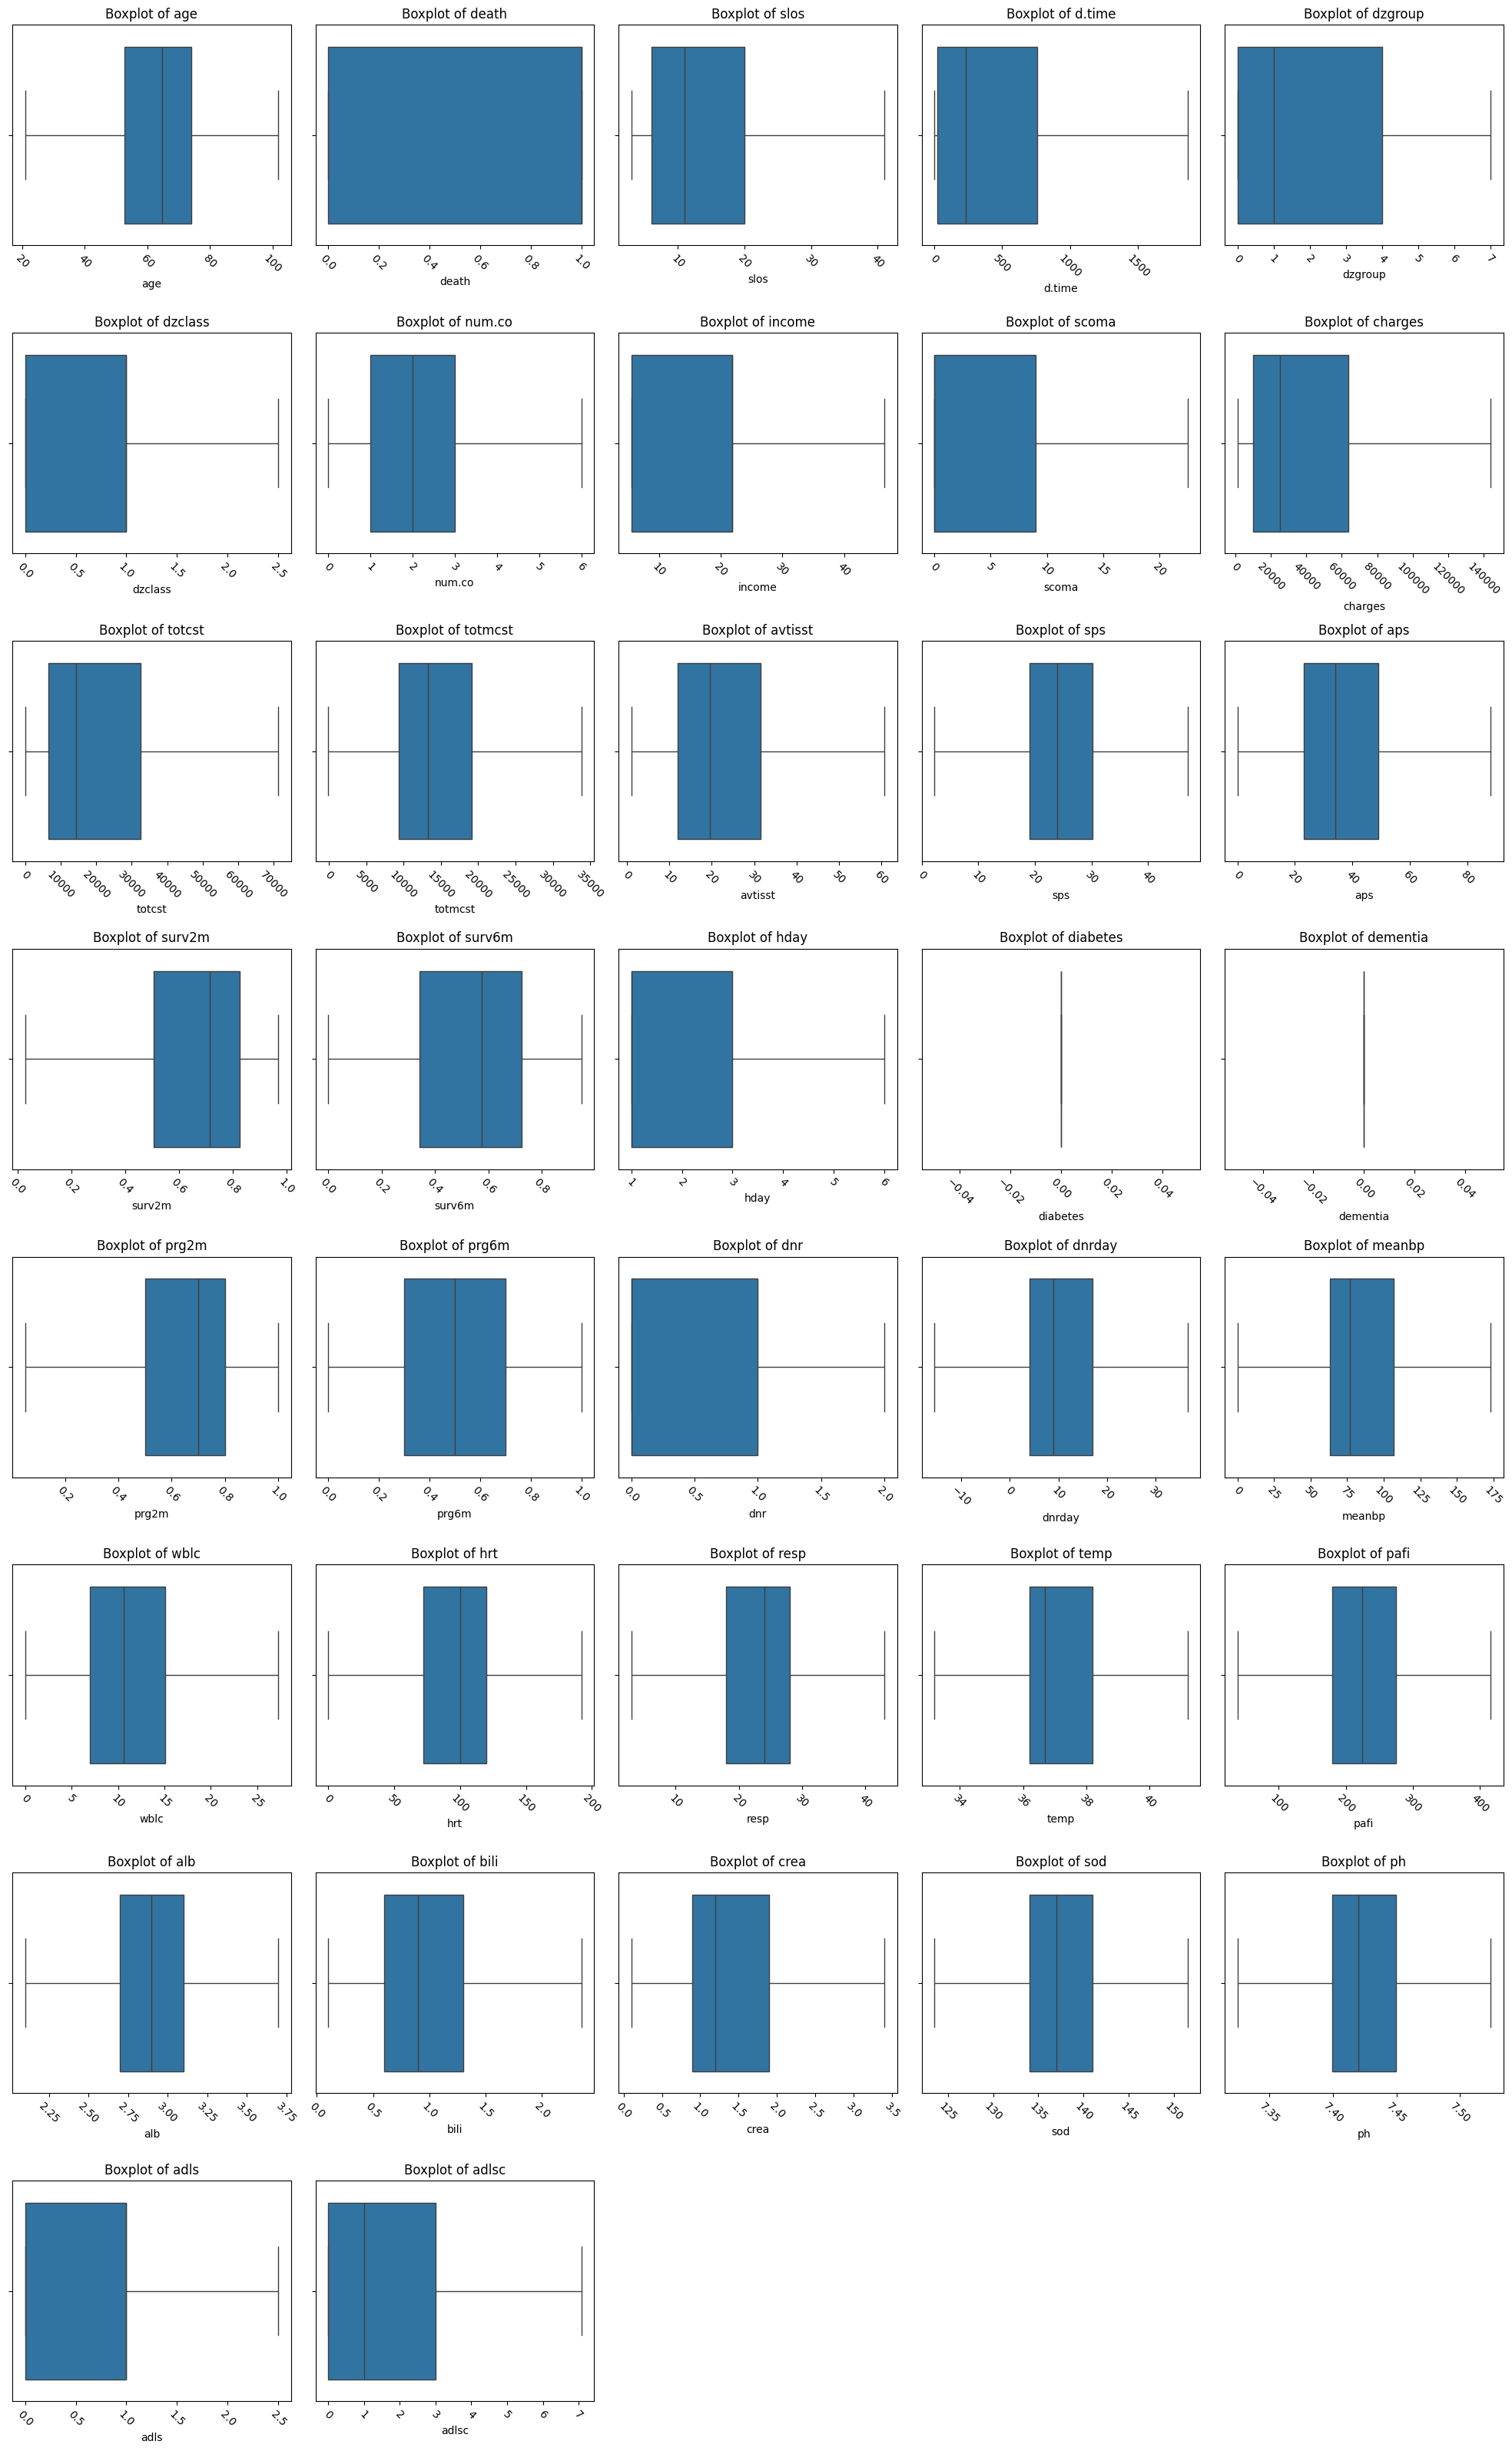

In [ ]:
cols = df.select_dtypes(include=['float64', 'int64']).columns

n_features = len(cols)
n_cols = 5
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(20, 4 * n_rows))

for i, cols in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df[cols])
    plt.title(f'Boxplot of {cols}')
    plt.xticks(rotation=-45)

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   slos      9105 non-null   int64  
 4   d.time    9105 non-null   float64
 5   dzgroup   9105 non-null   int64  
 6   dzclass   9105 non-null   float64
 7   num.co    9105 non-null   int64  
 8   income    9105 non-null   float64
 9   scoma     9105 non-null   float64
 10  charges   9105 non-null   float64
 11  totcst    9105 non-null   float64
 12  totmcst   9105 non-null   float64
 13  avtisst   9105 non-null   float64
 14  sps       9105 non-null   float64
 15  aps       9105 non-null   float64
 16  surv2m    9105 non-null   float64
 17  surv6m    9105 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int64  
 

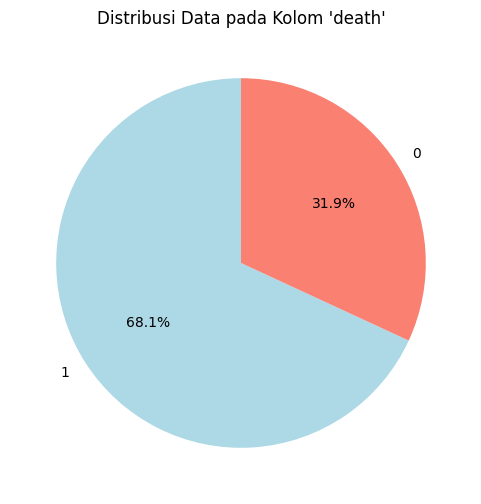

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
death_counts = df['death'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(death_counts, labels=death_counts.index, autopct='%1.1f%%', colors=['lightblue', 'salmon', 'lightgreen'], startangle=90)
plt.title("Distribusi Data pada Kolom 'death'")
plt.show()


***DATA TRANSFORMATION***
---
Dengan menggunakan Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['age', 'scoma', 'avtisst', 'aps', 'sps', 'totcst', 'totmcst', 'crea', 'charges', 'adls', 'prg2m', 'prg6m', 'adlsc', 'dnrday', 'bili', 'alb']] = scaler.fit_transform(df[['age', 'scoma', 'avtisst', 'aps', 'sps', 'totcst', 'totmcst', 'crea', 'charges', 'adls', 'prg2m', 'prg6m', 'adlsc', 'dnrday', 'bili', 'alb']])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   slos      9105 non-null   int64  
 4   d.time    9105 non-null   float64
 5   dzgroup   9105 non-null   int64  
 6   dzclass   9105 non-null   float64
 7   num.co    9105 non-null   int64  
 8   income    9105 non-null   float64
 9   scoma     9105 non-null   float64
 10  charges   9105 non-null   float64
 11  totcst    9105 non-null   float64
 12  totmcst   9105 non-null   float64
 13  avtisst   9105 non-null   float64
 14  sps       9105 non-null   float64
 15  aps       9105 non-null   float64
 16  surv2m    9105 non-null   float64
 17  surv6m    9105 non-null   float64
 18  hday      9105 non-null   int64  
 19  diabetes  9105 non-null   int64  
 20  dementia  9105 non-null   int64  
 

In [ ]:
df=df.drop(['sex'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 39 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   slos      9105 non-null   int64  
 3   d.time    9105 non-null   float64
 4   dzgroup   9105 non-null   int64  
 5   dzclass   9105 non-null   float64
 6   num.co    9105 non-null   int64  
 7   income    9105 non-null   float64
 8   scoma     9105 non-null   float64
 9   charges   9105 non-null   float64
 10  totcst    9105 non-null   float64
 11  totmcst   9105 non-null   float64
 12  avtisst   9105 non-null   float64
 13  sps       9105 non-null   float64
 14  aps       9105 non-null   float64
 15  surv2m    9105 non-null   float64
 16  surv6m    9105 non-null   float64
 17  hday      9105 non-null   int64  
 18  diabetes  9105 non-null   int64  
 19  dementia  9105 non-null   int64  
 20  prg2m     9105 non-null   float64
 

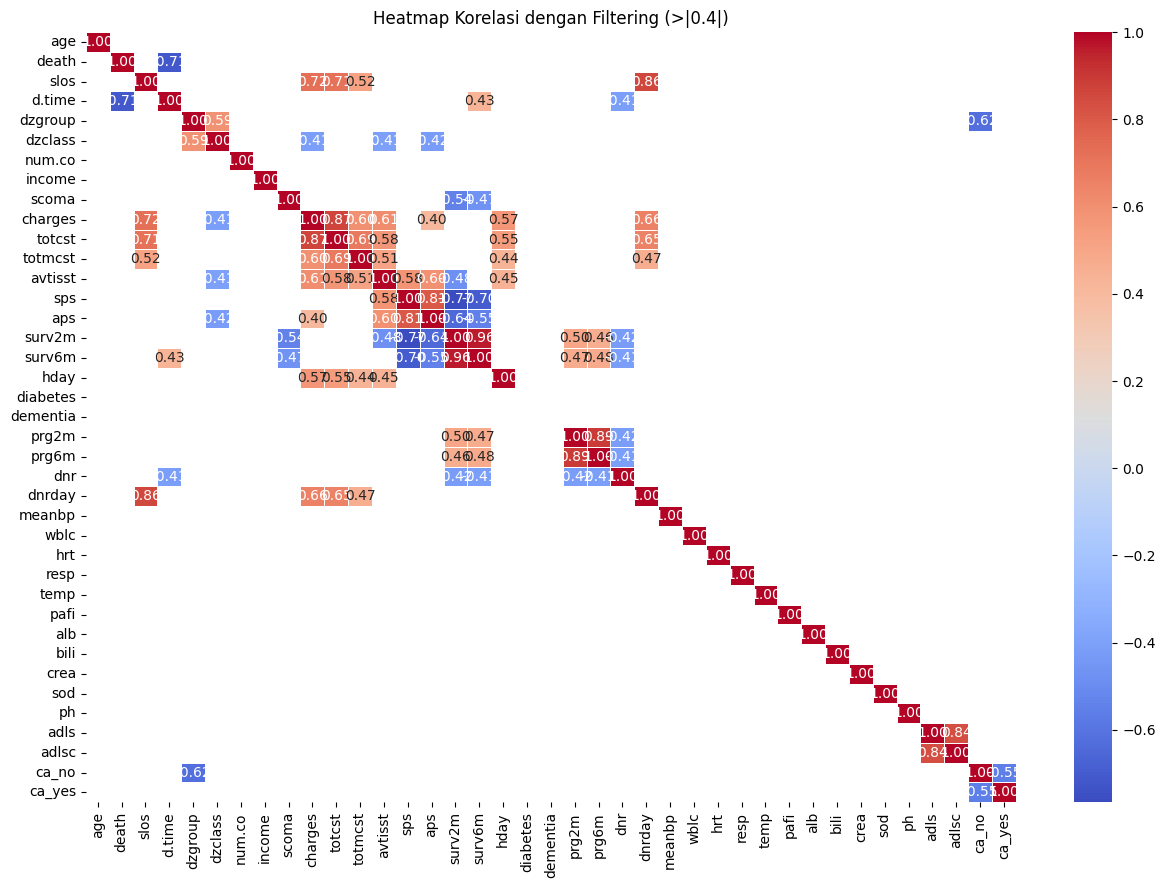

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()

threshold = 0.4
strong_corr = corr_matrix[abs(corr_matrix) > threshold]
plt.figure(figsize=(15, 10))
sns.heatmap(strong_corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi dengan Filtering (>|0.4|)")
plt.show()

In [ ]:
missing_values = df.isnull().mean() * 100
print(missing_values)

age         0.0
death       0.0
slos        0.0
d.time      0.0
dzgroup     0.0
dzclass     0.0
num.co      0.0
income      0.0
scoma       0.0
charges     0.0
totcst      0.0
totmcst     0.0
avtisst     0.0
sps         0.0
aps         0.0
surv2m      0.0
surv6m      0.0
hday        0.0
diabetes    0.0
dementia    0.0
prg2m       0.0
prg6m       0.0
dnr         0.0
dnrday      0.0
meanbp      0.0
wblc        0.0
hrt         0.0
resp        0.0
temp        0.0
pafi        0.0
alb         0.0
bili        0.0
crea        0.0
sod         0.0
ph          0.0
adls        0.0
adlsc       0.0
ca_no       0.0
ca_yes      0.0
dtype: float64


In [ ]:
# df.info()

# ***MODELING***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = df.drop(columns=["death"])
y = df["death"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

***SMOTE***
---
Smote dengan over sampling dilakukan karena data pada label death imbalance.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi Model KNN: {accuracy:.4f}')

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))


Akurasi Model KNN: 0.8677
Confusion Matrix:
[[ 479  102]
 [ 139 1101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       581
           1       0.92      0.89      0.90      1240

    accuracy                           0.87      1821
   macro avg       0.85      0.86      0.85      1821
weighted avg       0.87      0.87      0.87      1821

